In [12]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [13]:
def get_daily_stock_info(symbol):
        
        # Define the start and end dates for your desired one-year period
        end_date = datetime.datetime.now().date()
        start_date = end_date - datetime.timedelta(days=365)

        # Fetch the historical data
        target_data = yf.download(symbol, start=start_date, end=end_date)
        return(target_data)

In [14]:
stock_df = get_daily_stock_info('TGT')
stock_df = stock_df.reset_index()
stock_df.columns.values[0] = 'Date'
stock_df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-31,166.000000,167.360001,164.020004,164.250000,159.748611,3792500
1,2022-11-01,166.440002,166.979996,162.570007,164.589996,160.079300,3051000
2,2022-11-02,164.580002,165.889999,160.080002,160.199997,155.809616,3377900
3,2022-11-03,157.979996,160.789993,157.750000,159.800003,155.420578,3041600
4,2022-11-04,162.410004,162.750000,156.259995,159.630005,155.255249,2653500


In [15]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       251 non-null    datetime64[ns]
 1   Open       251 non-null    float64       
 2   High       251 non-null    float64       
 3   Low        251 non-null    float64       
 4   Close      251 non-null    float64       
 5   Adj Close  251 non-null    float64       
 6   Volume     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [16]:
colors = {
    'red': '#ff207c',
    'grey': '#d0d0d7',
    'blue': '#207cff',
    'orange': '#ffa320',
    'green': '#00ec8b',
    'black': '#101010'
}
config_ticks = {
    'size': 14,
    'color': colors['grey'],
    'labelcolor': colors['grey']
}
config_title = {
    'size': 18,
    'color': colors['grey'],
    'ha': 'left',
    'va': 'baseline'
}
dark_theme = {
    'font.family': 'Consolas',
    'axes.facecolor': colors['black'],
    'axes.edgecolor': colors['grey'],
    'axes.labelcolor': colors['grey'],
    'text.color': colors['grey'],
    'xtick.color': colors['grey'],
    'ytick.color': colors['grey'],
    'grid.color': colors['grey'],
    'figure.facecolor': colors['black'],
    'legend.edgecolor': colors['grey'],
}
plt.style.use(dark_theme)

In [17]:
def format_borders(plot):
    plot.spines['top'].set_visible(False)
    plot.spines['left'].set_visible(False)
    plot.spines['left'].set_color(colors['grey'])
    plot.spines['bottom'].set_color(colors['grey'])

In [18]:
def format_legend(plot):
    plot_legend = plot.legend(loc='upper left', 
    bbox_to_anchor= (-0.005, 0.95), fontsize=16)    
    for text in plot_legend.get_texts():
        text.set_color(colors['grey'])

In [19]:
def plot_ma(plot, x, y):
    mov_avg = {
        'MA (50)': {'Range': 50, 'Color': colors['orange']}, 
        'MA (100)': {'Range': 100, 'Color': colors['green']}, 
        'MA (200)': {'Range': 200, 'Color': colors['red']}
    }
    
    for ma, ma_info in mov_avg.items():
        plot.plot(
            x, y.rolling(ma_info['Range']).mean(), 
            color=ma_info['Color'], label=ma, linewidth=2, ls='--'
        )

In [20]:
def get_prev_day_info(plot):
    previous_close='$' + str("{:,}".format(stock_df['Close'][0])) 
    previous_volume=str("{:,}".format(stock_df['Volume'][0]))
    previous_date=str(stock_df['Date'][0].date())    
    plot.set_title(
        'Closing price on ' + previous_date + ': ' + 
         previous_close  + '\nShares traded on ' + previous_date +
         ': ' + previous_volume, fontdict=config_title, loc='left'
    )

In [21]:
def get_charts(stock_data):
    plt.rc('figure', figsize=(15, 10))

    fig, axes = plt.subplots(2, 1,
                                gridspec_kw={'height_ratios': [3, 1]})
    fig.tight_layout(pad=3)

    date = stock_data['Date']
    close = stock_data['Close']
    vol = stock_data['Volume']

    plot_price = axes[0]
    plot_price.plot(date, close, color=colors['blue'],
                    linewidth=2, label='Price')

    plot_vol = axes[1]
    plot_vol.bar(date, vol, width=15, color='darkgrey')

    plot_price.yaxis.tick_right()
    plot_price.tick_params(axis='both', **config_ticks)
    plot_price.set_ylabel('Price (in USD)', fontsize=14)
    plot_price.yaxis.set_label_position("right")
    plot_price.yaxis.label.set_color(colors['grey'])
    plot_price.grid(axis='y', color='gainsboro',
                    linestyle='-', linewidth=0.5)
    plot_price.set_axisbelow(True)

    format_borders(plot_price)
    format_borders(plot_vol)

    fig.suptitle('TGT Price and Volume', size=36, color=colors['grey'], x=0.24, y=1.10)
    get_prev_day_info(plot_price)
    plot_ma(plot_price, date, close)
    format_legend(plot_price)


    plt.tight_layout()
    plt.savefig('target_stock_chart.svg', format='svg', bbox_inches='tight')
    plt.show()

C:\Users\sadams\AppData\Local\Temp\ipykernel_4972\1616008833.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


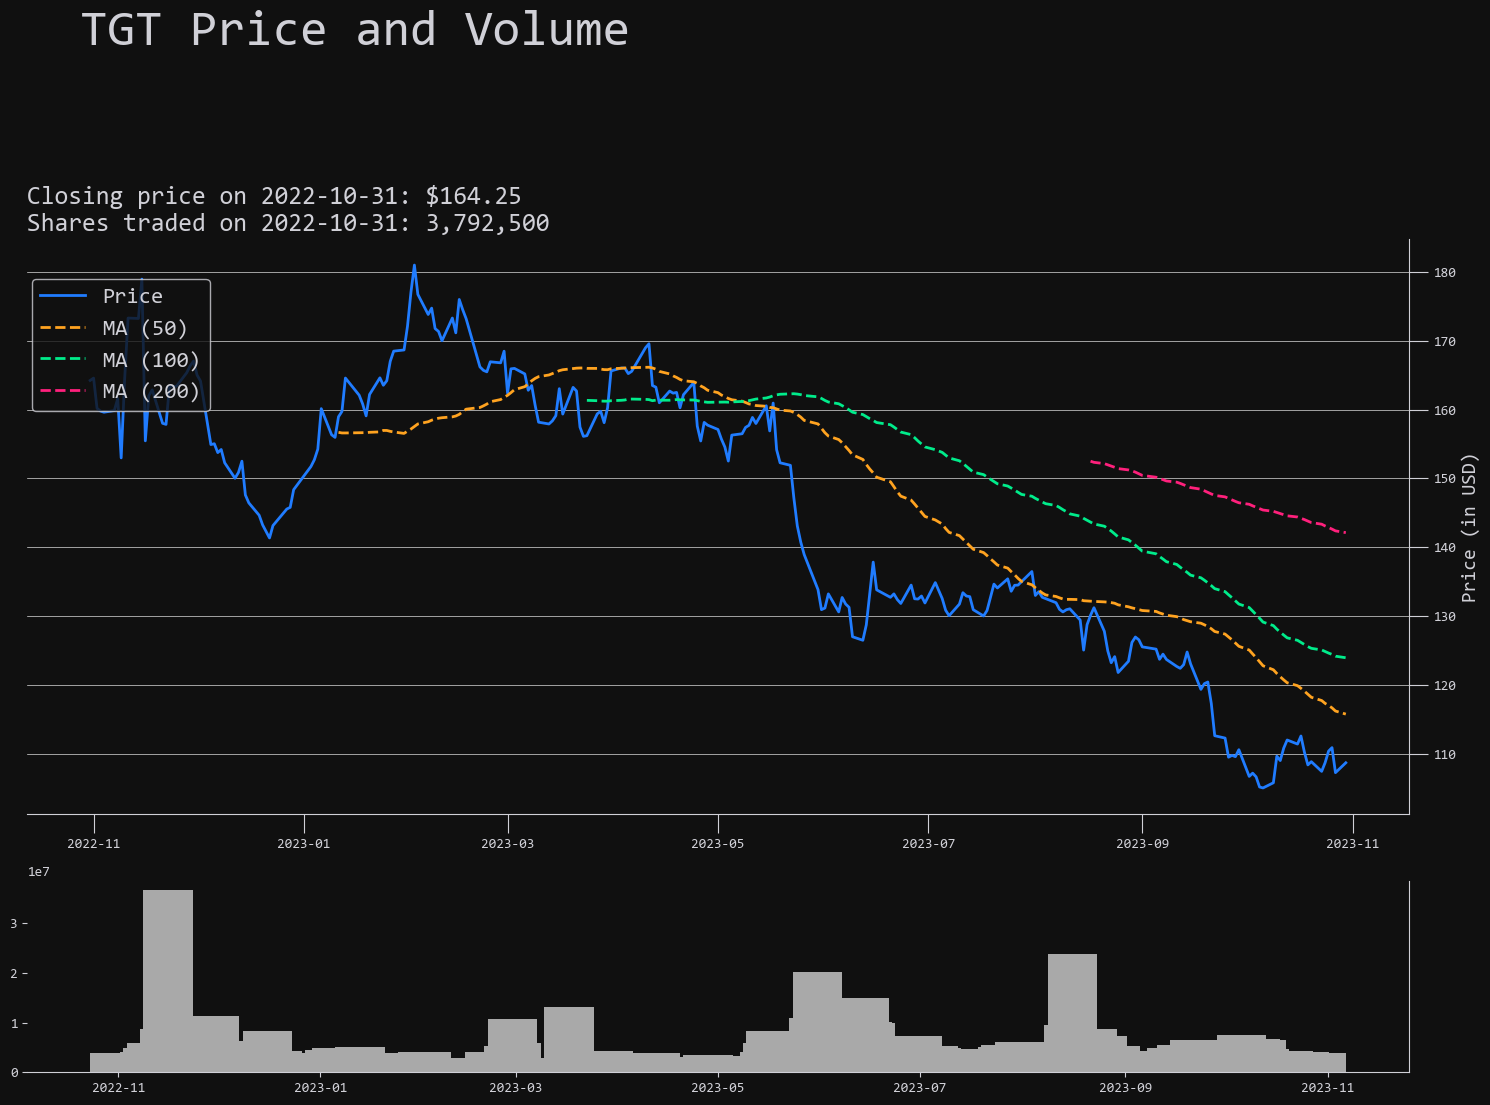

In [22]:
get_charts(stock_df)